In [29]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [87]:
# Load data and create dataframe
phi = np.load("Phi_201snap.npy")
df = pd.DataFrame(columns=['norm'], index=np.arange(201))
my_dpi = 192

for i in range(201):
    arr = phi[:,:,i]

    # Plot image (raw automatically converted to grayscale)
    plt.figure(figsize=(294/my_dpi, 165/my_dpi), dpi=my_dpi)
    plt.imshow(arr, cmap='gray')
    plt.axis("off")

    # Save as JPG and open again to convert to np array
    plt.savefig('analysis2.1.jpg', bbox_inches='tight', pad_inches=0)
    plt.close()
    im = Image.open('analysis2.1.jpg')
    output_array = np.asarray(im)

    # Create convert function to use to convert output_array back to raw values
    phimax, phimin = np.max(arr), np.min(arr)
    ratio = (phimax-phimin)/255
    def convertRGBToRaw(x):
        return ratio*x + phimin

    # Loop through output_array and replace RGB by raw in copy
    copy = arr.copy()
    for i, row in enumerate(output_array):
        for j, col in enumerate(row):
            copy[i][j] = convertRGBToRaw(col[0])

    # Compute norm and add to dataframe
    diff = copy - arr
    norm = np.linalg.norm(diff)
    df.at[i, 'norm'] = norm
df

,norm
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
196,NaN
197,NaN
198,NaN
199,NaN


array([[-1.33610863e-03, -1.33610863e-03, -1.33610863e-03, ...,
        -4.01359608e-04, -4.01359608e-04, -4.01359608e-04],
       [-6.07298627e-04, -7.33118627e-04, -8.58938627e-04, ...,
        -4.30698627e-04, -5.18998627e-04, -6.07298627e-04],
       [-1.49988627e-04, -3.37468627e-04, -5.24948627e-04, ...,
        -1.62751667e-03, -1.82350667e-03, -2.01948667e-03],
       ...,
       [ 1.32854937e-03,  1.09334437e-03,  8.82910373e-04, ...,
        -2.42016667e-05, -2.86645767e-04, -5.40948667e-04],
       [ 5.11108353e-04,  3.78283353e-04,  2.59606353e-04, ...,
        -1.33774667e-04, -2.80641567e-04, -4.23640667e-04],
       [ 7.41856353e-04,  7.08243353e-04,  6.74125753e-04, ...,
        -1.43378667e-04, -1.65253667e-04, -1.92892667e-04]])

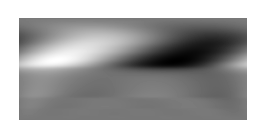

In [78]:
# Example with i = 160
phi = np.load("Phi_201snap.npy")
arr = phi[:,:,160]
plt.figure(figsize=(294/my_dpi, 165/my_dpi), dpi=my_dpi)
plt.imshow(arr, cmap='gray')
plt.axis("off")
plt.savefig('analysis2.1.jpg', bbox_inches='tight', pad_inches=0)
im = Image.open('analysis2.1.jpg')
output_array = np.asarray(im)
output_array
copy = arr.copy()
phimax, phimin = np.max(arr), np.min(arr)
ratio = (phimax-phimin)/255
def convertRGBToRaw(x):
    return ratio*x + phimin
for i, row in enumerate(output_array):
    for j, col in enumerate(row):
        copy[i][j] = convertRGBToRaw(col[0])
norm = np.linalg.norm(copy - arr)
copy - arr